In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kadiri
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | necochea
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | pitimbu
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | wronki
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | shimoda
Processing Record 14 of Set 1 | puerto carreno
Processing Record 15 of Set 1 | san cristobal
Processing Record 16 of Set 1 | kaeo
Processing Record 17 of Set 1 | naryan-mar
Processing Record 18 of Set 1 | dubbo
Processing Record 19 of Set 1 | kabinda
Processing Record 20 of Set 1 | hamilton
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | katsuura
Processing Record 23 of

Processing Record 41 of Set 4 | luderitz
Processing Record 42 of Set 4 | russell
Processing Record 43 of Set 4 | saint george
Processing Record 44 of Set 4 | yellowknife
Processing Record 45 of Set 4 | gat
Processing Record 46 of Set 4 | nabire
Processing Record 47 of Set 4 | esperance
Processing Record 48 of Set 4 | lomovka
Processing Record 49 of Set 4 | cidreira
Processing Record 50 of Set 4 | lebu
Processing Record 1 of Set 5 | san patricio
Processing Record 2 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 5 | badia polesine
Processing Record 4 of Set 5 | victor harbor
Processing Record 5 of Set 5 | mandalgovi
Processing Record 6 of Set 5 | mar del plata
Processing Record 7 of Set 5 | inhambane
Processing Record 8 of Set 5 | luancheng
Processing Record 9 of Set 5 | santa maria visitacion
Processing Record 10 of Set 5 | sorong
Processing Record 11 of Set 5 | kenora
Processing Record 12 of Set 5 | yomou
Processing Record 13 of Set 5 | laguna
Processing Rec

Processing Record 33 of Set 8 | killam
Processing Record 34 of Set 8 | port lincoln
Processing Record 35 of Set 8 | olinda
Processing Record 36 of Set 8 | geraldton
Processing Record 37 of Set 8 | sandnessjoen
Processing Record 38 of Set 8 | bad munder
City not found. Skipping...
Processing Record 39 of Set 8 | zvishavane
Processing Record 40 of Set 8 | veraval
Processing Record 41 of Set 8 | sokoni
Processing Record 42 of Set 8 | comodoro rivadavia
Processing Record 43 of Set 8 | bac giang
Processing Record 44 of Set 8 | kizema
Processing Record 45 of Set 8 | nguiu
City not found. Skipping...
Processing Record 46 of Set 8 | temaraia
City not found. Skipping...
Processing Record 47 of Set 8 | pangai
Processing Record 48 of Set 8 | zlobin
Processing Record 49 of Set 8 | college
Processing Record 50 of Set 8 | kutoarjo
Processing Record 1 of Set 9 | parana
Processing Record 2 of Set 9 | hunza
City not found. Skipping...
Processing Record 3 of Set 9 | pilar
Processing Record 4 of Set 9 | 

Processing Record 20 of Set 12 | manjacaze
Processing Record 21 of Set 12 | sitka
Processing Record 22 of Set 12 | pontarlier
Processing Record 23 of Set 12 | abaete
Processing Record 24 of Set 12 | tessalit
Processing Record 25 of Set 12 | port blair
Processing Record 26 of Set 12 | mackay
Processing Record 27 of Set 12 | kulevcha
Processing Record 28 of Set 12 | verkhnyaya inta
Processing Record 29 of Set 12 | amapa
Processing Record 30 of Set 12 | acapulco
Processing Record 31 of Set 12 | bambanglipuro
Processing Record 32 of Set 12 | vikulovo
Processing Record 33 of Set 12 | iwaki
Processing Record 34 of Set 12 | guadalupe victoria
Processing Record 35 of Set 12 | gladstone
Processing Record 36 of Set 12 | lulea
Processing Record 37 of Set 12 | tutoia
Processing Record 38 of Set 12 | satwas
Processing Record 39 of Set 12 | barranca
Processing Record 40 of Set 12 | marystown
Processing Record 41 of Set 12 | hounde
Processing Record 42 of Set 12 | pinega
Processing Record 43 of Set 1

In [6]:
len(city_data)

560

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kadiri,14.1167,78.1667,87.21,50,51,13.06,IN,2021-05-31 14:58:21
1,Rikitea,-23.1203,-134.9692,74.08,66,0,13.47,PF,2021-05-31 14:58:21
2,Necochea,-38.5473,-58.7368,57.04,63,57,21.65,AR,2021-05-31 14:58:22
3,Georgetown,5.4112,100.3354,86.90,76,20,1.01,MY,2021-05-31 14:58:22
4,Bluff,-46.6000,168.3333,49.80,66,93,6.04,NZ,2021-05-31 14:58:22
5,Dikson,73.5069,80.5464,31.06,97,100,16.84,RU,2021-05-31 14:58:23
6,Ushuaia,-54.8000,-68.3000,29.86,86,75,6.91,AR,2021-05-31 14:57:02
7,Pitimbu,-7.4706,-34.8086,77.59,78,41,13.00,BR,2021-05-31 14:58:23
8,Albany,42.6001,-73.9662,54.91,80,99,6.82,US,2021-05-31 14:55:07
9,Wronki,52.7105,16.3804,68.54,41,44,5.30,PL,2021-05-31 14:58:24


In [8]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kadiri,IN,2021-05-31 14:58:21,14.1167,78.1667,87.21,50,51,13.06
1,Rikitea,PF,2021-05-31 14:58:21,-23.1203,-134.9692,74.08,66,0,13.47
2,Necochea,AR,2021-05-31 14:58:22,-38.5473,-58.7368,57.04,63,57,21.65
3,Georgetown,MY,2021-05-31 14:58:22,5.4112,100.3354,86.90,76,20,1.01
4,Bluff,NZ,2021-05-31 14:58:22,-46.6000,168.3333,49.80,66,93,6.04
5,Dikson,RU,2021-05-31 14:58:23,73.5069,80.5464,31.06,97,100,16.84
6,Ushuaia,AR,2021-05-31 14:57:02,-54.8000,-68.3000,29.86,86,75,6.91
7,Pitimbu,BR,2021-05-31 14:58:23,-7.4706,-34.8086,77.59,78,41,13.00
8,Albany,US,2021-05-31 14:55:07,42.6001,-73.9662,54.91,80,99,6.82
9,Wronki,PL,2021-05-31 14:58:24,52.7105,16.3804,68.54,41,44,5.30


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
city_data_df = pd.read_csv("weather_data/cities.csv")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

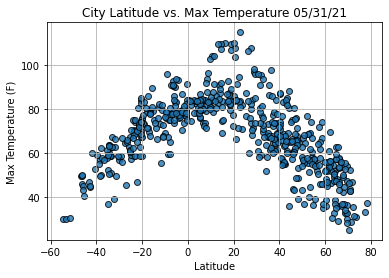

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

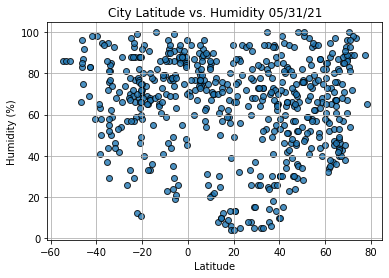

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

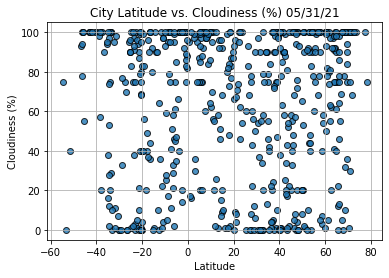

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

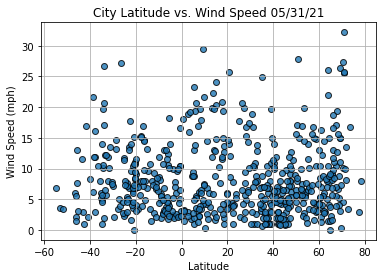

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    return r_value

In [17]:
index13 = city_data_df.loc[13]
index13


City_ID                        13
City                San Cristobal
Country                        VE
Date          2021-05-31 14:58:25
Lat                        7.7669
Lng                       -72.225
Max Temp                    78.98
Humidity                       63
Cloudiness                     97
Wind Speed                   6.13
Name: 13, dtype: object

In [18]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Kadiri,IN,2021-05-31 14:58:21,14.1167,78.1667,87.21,50,51,13.06
3,3,Georgetown,MY,2021-05-31 14:58:22,5.4112,100.3354,86.90,76,20,1.01
5,5,Dikson,RU,2021-05-31 14:58:23,73.5069,80.5464,31.06,97,100,16.84
8,8,Albany,US,2021-05-31 14:55:07,42.6001,-73.9662,54.91,80,99,6.82
9,9,Wronki,PL,2021-05-31 14:58:24,52.7105,16.3804,68.54,41,44,5.30


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

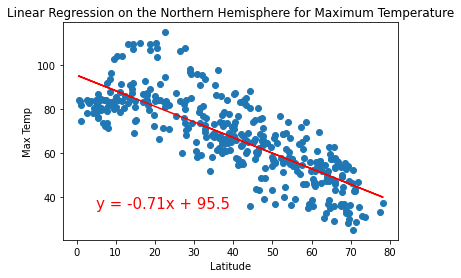

-0.7950667943906623

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(5,35))

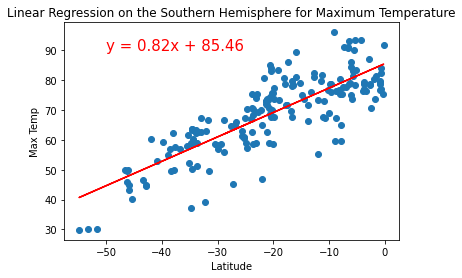

0.8187818439083812

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

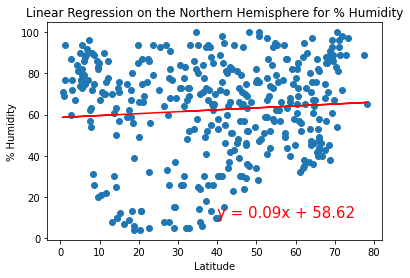

0.07825215007595064

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

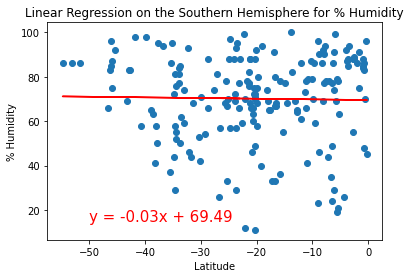

-0.019660724119886355

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

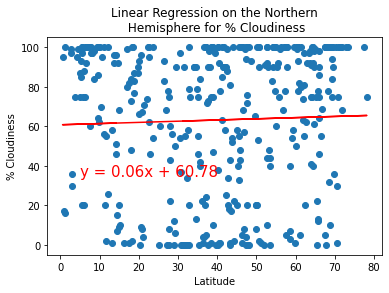

0.033807270926939


In [24]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
r_north = plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern\n Hemisphere for % Cloudiness', '% Cloudiness',(5,35))
print(r_north)

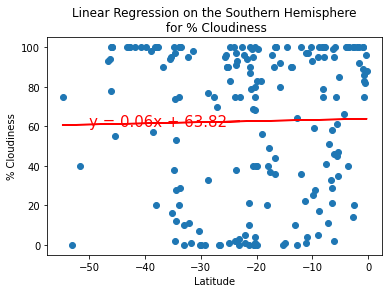

0.020165389561875087


In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
r_south = plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere\n for % Cloudiness", '% Cloudiness',(-50,60))
print(r_south)

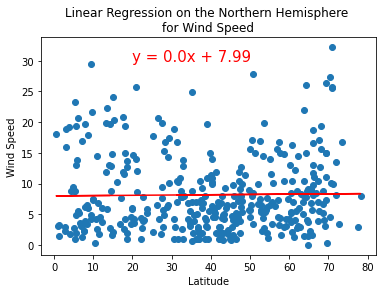

0.015384037392691135

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(20,30))

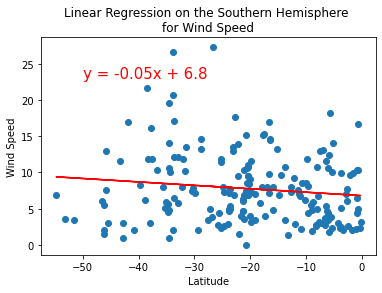

-0.12753673186378214

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,23))